# Affective Computing - Programming Assignment 1




#### Objective

The objective of the exercise is to build the facial expression recognition system. The system includes face preprocessing, feature extraction and classification. In the exercise, you will learn how to preprocess the facial expression image, extract the feature from an image or a video, and classify the video into one category.

Specifically, the region of interest (i.e., facial image) is extracted using face tracking, face registration and face crop functions. Basic spatiotemporal features (i.e., LBP-TOP features) are extracted using LBP-TOP. To produce emotion recognition case, Support Vector Machine (SVM) classifiers are trained. 50 videos from 5 participants are used to train the emotion recognition, use spatiotemporal features. The rest of the data (50 videos) is used to evaluate the performances of the trained recognition systems.


#### Database
The original facial expression data is a sub-set of eNTERFACE (acted facial expression), from ten actors acting **happy** and sadness** behaviors. The used dataset in the exercise includes 100 facial expression samples. 

#### Completing the assignment

To complete the assignment all the tasks have to be done and all the questions answered.

<!---#### Help-->
<!--- The data and toolbox files used in this exercise can be found in the Affective Computing course webpage (see the Noppa system).
-->

<!---In the exercise, you should know that some basic python libries (numpy, scikit-image, scipy, pyploy, sklearn) before the programming. If you have questions, send your question to us: 
* [Henglin.Shi@oulu.fi](mailto:Henglin.Shi@oulu.fi)
* [Yante.Li@oulu.fi](mail.Yante.Li@oulu.fi)-->

<!---Use the following website to help the usage of python libries. 
* numpy: http://www.numpy.org/
* skimage: https://scikit-image.org/
* scipy: https://www.scipy.org/
* matplotlib.pyplot: https://matplotlib.org/api/pyplot_api.html
* sklearn: http://scikit-learn.org/stable/
    * sklearn.svm: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    * skealrn.metrics.confusion_matrix: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html-->

## Task 1. Face preprocessing

In this part, you are supposed to process a face image. There are three subtasks you need to do:
* **Task 1.1.** Detect face and facial landmarks using the [`DLib`](http://dlib.net/) library.
* **Task 1.2.** You are asked to perform a face registration task using a set of fixed landmarks from a standard model, and extract face from the registered image.
* **Task 1.3.** Visualize your result using subplots.

### Task 1.1. Extract facial landmarks
**Steps**:
1. Load the example image *example_img.jpg*, using the [`skimage.io.imread()`](http://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread) function for example.
2. Initialize a face detector and a face landmarks detector. We have provide the code for this part.
3. Detect face
4. Detect the face landmarks
5. Transfrom the detected result to a 2-D array, we provide the function *shape2points()* below to perform this.

*Here is an example for facial landmarks extraction: http://dlib.net/face_landmark_detection.py.html*



In [12]:
# Loading required libraries
import dlib
import numpy as np
from skimage import io


def shape2points(shape, dtype='int', point_num=68):
    coords = np.zeros((point_num, 2), dtype=dtype)
    for i in range(point_num):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords



# 1. Load example_img.jpg, using skimage.io.imread()
image = io.imread("example_img.jpg")
# io.imshow(image)

# 2. Initializing face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


# 3. Detect face, return rectangles, each rectangle corresponds to one face.
# You need to fill the missing argument of this function
dets = detector(image, 1)
# print(dets)

# Extract the shape of the face in the first rectangle (using the first element of the rectangles variable
shape = predictor(image, dets[0])
# print(shape)


# Extract facial landmarks from shape by calling the shape2points() function.
coordinates = shape2points(shape)
# print(coordinates)


### Task 1.2. Face normalization
**Steps**:
1. Load the landmark position of a standard face model. We provide these positions in a csv file, and also the code block to read these positions.
2. Calculate the transformation between your detected landmarks position and the standard face model landmark positions using the [`skimage.transform.PolynomialTransform()`](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.PolynomialTransform) class and its *estimate()* methods. 
    1. Instantiate a PolynomialTransform object by calling transform.PolynomialTransform()
    2. Call its estimate() method to calculate the transformation between the two sets of points. The manual of this method can be found in the same page which introduced of this class. 
3. Transform the example image using the calculated transformation to register (map) the example image into a space of the standard face model. You can use the [`skimage.transform.warp()`](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.warp) function to perform this.
4. Crop the face from the registered face using the standard face model landmarks. The cropping function is provided in the *exercise1_lib.py*, you can directly use it after importing. 
5. Also extract the face from the example image using your detected landmarks.
<!---Use **cropFace** to crop the facial image from the background. For details on the **cropFace** function, please read the function in **exercise1Lib.py**. Usually, we have to do the face registration to remove the subject characteristics. To do a  face registration, firstly you need a set of landmarks of a standard face model. Then you calculate the transformation between you detected landmarks and the standard landmarks. Last you apply the transformation on your example image/-->

*We offer the code to load a standard face model, which contains the mean position of landmarkds estimated from the training data.*

In [28]:
# 1. Load the landmark position of the standard face model from a csv file and store them in standard_model
import csv
import numpy as np
standard_model = np.zeros((68, 2))
with open('mean.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(reader):
        standard_model[i, 0] = float(row[0])
        standard_model[i, 1] = float(row[1])
standard_model = standard_model * 500

<!---**Then you need to calculate the transformation using [`skimage.transform.PolynomialTransform()`](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.PolynomialTransform)**. This class has several methods, expecially, you need to use the **estimate()** method to calculate the transformation between two sets of points. **Registering the example face** by transforming the example image into the standard model space, using [`skimage.transform.warp()`](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.warp) and you calculated transformation. **Cropping the original example image according to the detected landmarks, and the registered image according to the standard face mode. **-->

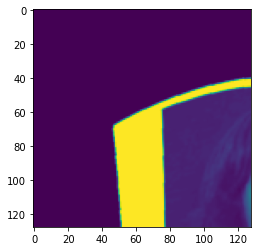

In [60]:
from skimage import transform
from exercise1_lib import crop_face

# 2. Calculating the transorfmation between the two set of points 
# 2.1 Instantiating a PolynomialTransform() transform function
poly = transform.PolynomialTransform()

# 2.2 Calculating the transformation by calling the estimate() method.
#     You do not need to retuern any value after calling this methods,
#     because the transformation parameter is store in the object you instantiated after calling this methods.
poly.estimate(standard_model, coordinates)


# 3. Warp the example image using the transform.warp() function
warped_image = transform.warp(image, poly)
# plt.imshow(warped_image)

# 4. Crop the face from registered image using the provided crop_face function.
cropped_warp = crop_face(warped_image, standard_model)
# plt.imshow(cropped)

# 5. Crop the face from the example image using detected landmarks
cropped_image = crop_face(image, coordinates)
# plt.imshow(cropped_image)



### Task 1.3. Display result
Here you are asked to draw a figure with 3 x 2 subplots using [`matplotlib.pyplot.subplots()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html). Please read the manual of it and also the [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Each of the subplots should have the following images:
* subplot [0, 0]: the original example image and detected landmarks.
* subplot [1, 0]: the face cropped from the example image. 
* subplot [2, 0]: the histogram of the face cropped from the example. 

*As an example, the three subplots are given above.* Then you need to implement:
* subplot [0, 1]: the registered face image.
* subplot [1, 1]: the face cropped from the registered face image.
* subplot [2, 1]: the histogram of the face cropped from the registered face image.



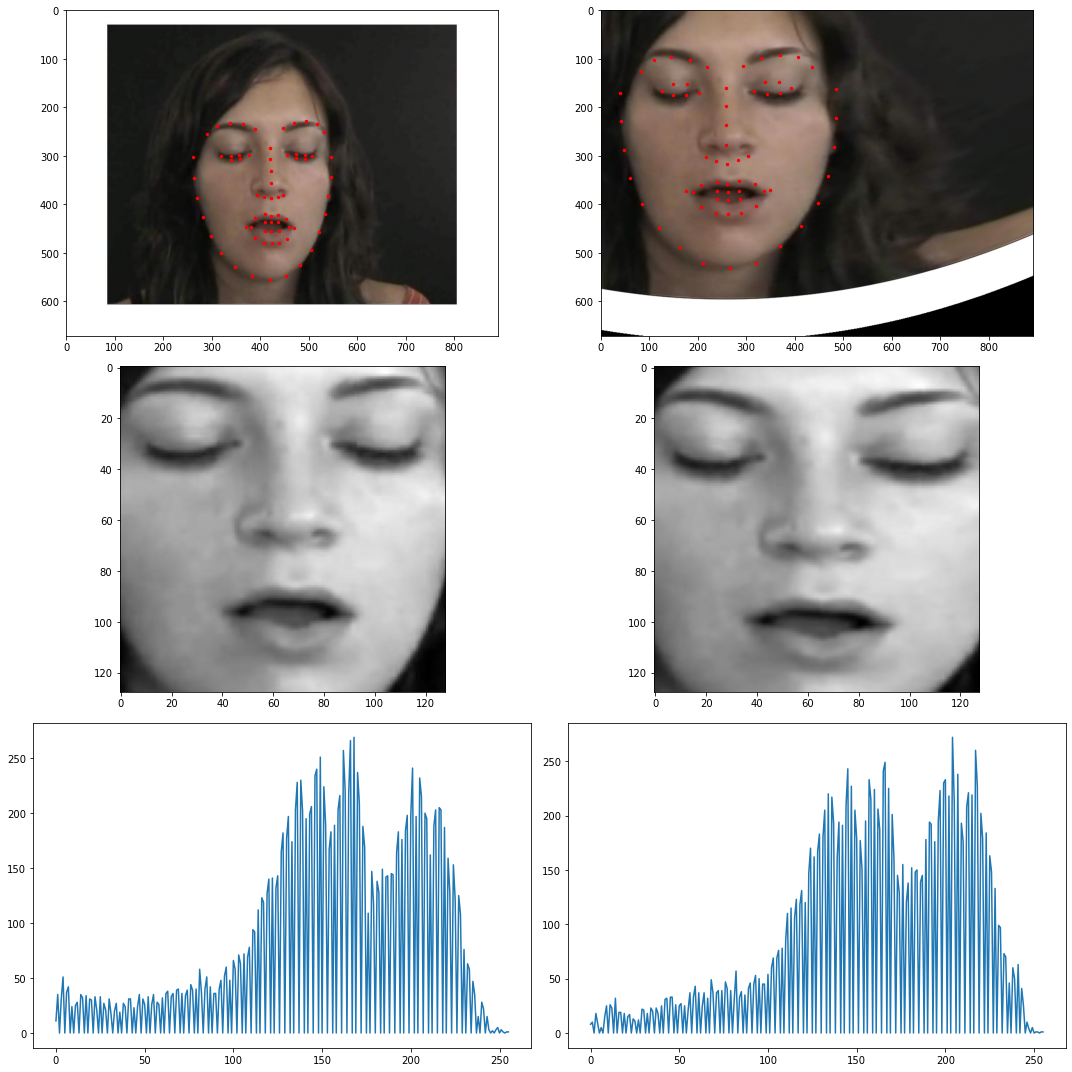

In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import img_as_ubyte

# Constructing figure with 2x3 subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# subplot [0,0]: show the original example image
ax[0, 0].imshow(image)

# Placing detected landmarks on subplot [0,0], we provide an exmaple to do this.
ax[0, 0].scatter(coordinates[:, 0], coordinates[:, 1], c="red", s=6)
  
# subplot [1,0]: show the face cropped from the example image.
ax[1, 0].imshow(cropped_image, 'gray')

# subplot [2,0]: show the histogram of the face cropped from the example image.
hist_cropped_example_face, _  = np.histogram(img_as_ubyte(cropped_image).ravel(), bins=256)
ax[2, 0].plot(hist_cropped_example_face)

# subplot [0,1]: show the registered image
ax[0, 1].imshow(warped_image)

# place the model landmarks on the registered image 
ax[0, 1].scatter(standard_model[:, 0], standard_model[:, 1], c="red", s=6)

# subplot [1,1]: show the face cropped from the registered image
ax[1, 1].imshow(cropped_warp, 'gray')

# subplot [2,1]: show the histogram of the face cropped from the registered image.
hist_cropped_warped_face, _  = np.histogram(img_as_ubyte(cropped_warp).ravel(), bins=256)
ax[2, 1].plot(hist_cropped_warped_face)

fig.tight_layout()
plt.show()

### Question 1. What is the difference between the cropped example image (subplot [1, 0]) and the cropped registered image (subplot [1, 1])? What is the mapping between the images called?
*Hints: Look at the two images very closely, the change is very subtle. The code may also provide hints for the transformation name.*

### Your answer:

The face in the registered image is more directly facing the 'viewer'. There is some distortion as well.
The mapping is done by polynomial transform estimation.

### Question 2. What is the purpose of the operation asked in the previous question, why is it done?

### Your answer:

As the task name suggests, the purpose is to normalize the face for further analysis.

## Task 2. Feature extraction
Here you are asked to extract LBP (Local Binary Pattern) features. LBP has been widely used in face recognition, facial expression recognition and texture classification.
Here you will use the [`skimage.feature.local_binary_pattern()`](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.local_binary_pattern) function to extract the LBP features. Steps are explained below.

**Steps**:
1. Define the LBP parameters. Before doing this, carefully read the documentation.
    1.  P: Number of neighbours, set P = 8
    2.  R: Radius of circle, set R = 1.0
    3.  LBP methods: set it as 'nri_uniform'

2. Extract the LBP face by calling the *skimage.feature.local_binary_pattern()* function

3. Calculate the histogram of the LBP face
    1. Caculate the histogram of the LBP face
    2. Normalize the histogram to make the histogram's sum one one (dividing each element by the sum of the histogram).

4. Visualize the result using two subplots.
    1. Show the LBP face on the left side in grayscale.
    2. Draw the normalized histogram on the right side, but using *.stem()* function rather *.plot()* for this time.

<StemContainer object of 3 artists>

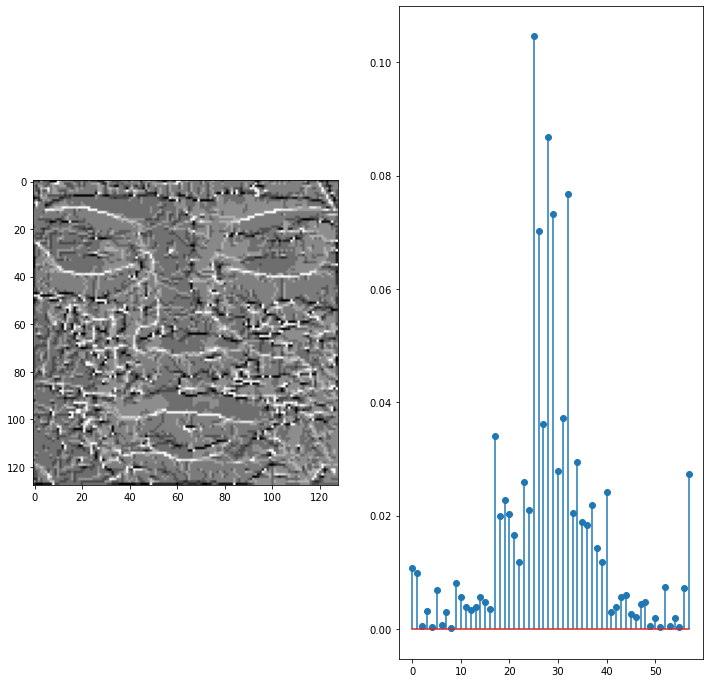

In [93]:
from skimage.feature import local_binary_pattern

# 1. Define the parameters to extract LBP features in (8, 1) neighborhood:
#    1.1 Set the number of neighbour P = 8
#    1.2 Set the radius if circir R = 1.0
#    2.3 Set the method as 'nri_uniform'
P = 8
R = 1.0
method = 'nri_uniform'

# 2. Extract the LBP face using local_binary_pattern()
lbp = local_binary_pattern(cropped_warp,P, R,method)


# 3. Calculate the histogram of the LBP face (58 bins). Sum of vector can be calculated by calling numpy.sum()
lbp_hist = np.histogram(lbp.ravel(), bins=58)
# print(lbp_hist)
lbp_hist_norm = lbp_hist[0]/np.sum(lbp_hist[0])



# 4. Visualize your result.
fig, ax = plt.subplots(1, 2, figsize=(12, 12))

ax[0].imshow(lbp, 'gray')

ax[1].stem(lbp_hist_norm, use_line_collection=True)

### Question 3. Why is feature extraction (e.g. LBP) used, why can't we simply classify the (raw) images in their original domain?

### Your answer:

## Task 3. Feature Classification

For feature classification the SVM (Support Vector Machine) will be utilized. See the documentation for [`sklearn.svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Mainly you will use its two methods: **fit()** to training the classifier and **predict()** to use the classifer for classification. There are following three subtasks you need to complete:
* Task 3.1. Load data
* Task 3.2. Train classifiers
* Task 3.3. Evaluate classifiers



### Task 3.1. Load data
Firstly, you need to read *.mat* files using python. You can use the [`scipy.io.loadmat()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html#scipy.io.loadmat) function to read *.mat* file. In the provided **Task3_data.mat** file, different data are packed by different dictionaries which are list below:
* training_data
* testing_data
* training_class
* testing_class

For example if you would like to load the *training_data* from the file, you can use **scipy.io.loadmat('Task3_data.mat')['training_data']**



In [95]:

import scipy.io as sio

# Loading data using scipy.io.loadmat(), or sio.loadmat
# Alternatively, you can us h5py also, if you would like to
mdata = sio.loadmat('Task3_data.mat')


# Load 'training_data'
sample_train = mdata['training_data']


# Load 'testing_data'
sample_test = mdata['testing_data']

# Load 'training_class'
label_train = mdata['training_class']

# Load 'testing_class'
label_test = mdata['testing_class']



### Task 3.3. Train SVM classifiers
Use the **sklearn.svm** library to train Support Vector Machine (SVM) classifiers. The ‘training_data’ and ‘testing_data’ matrices contain the calculated LBP-TOP features for the training and testing sets, respectively. The block size for LBP-TOP used for training and testing data are 2x2x1. The ‘training_class’ group vector contains the class of samples: 1 = happy, 2 = sadness, corresponding to the rows of the training data matrices.

**Steps**:
1.  Construct an SVM classifier using the linear kernel. See [`sklearn.svm.SVC()`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).

2.  Use the [`fit()`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit) method and the *training_data* and *training_class* to train your classifier.




In [96]:
from sklearn import svm
# 1. Initializing a SVM classifier, using linear kernel
clf = svm.SVC(kernel='linear')

# 2. using the classifier to fit your training data
clf.fit(sample_train, label_train)  


C:\Users\essiv\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

### Task 3.3. Evaluate your classifiers
**Steps**:
1. Use your trainined classifer to classify the *training_data* and *testing_data*, using the [`predict()`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict) method.
2. Calculate the classification accuricies when classifying the *training_data* and *testing_data*, respectively. The correct class labels corresponding with the rows of the training and testing data matrices are in the variables *training_class* and *testing_class*, respectively.
3. Calculate the confusion matrices when evaluating either dataset. Using [`sklearn.metrics.confusion_matrix()`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).


In [110]:
# 1. Predicting you training data and testing data.
prediction_train = clf.predict(sample_train)
prediction = clf.predict(sample_test)

# 2. Calculating the accuracies of your prediction on training data and testing data, respectively.
#    2.1 calculate the accuracy when classifying the training data 
correct_num_train = 0
for train, pred in zip(prediction_train, label_train):
    if train == pred:
        correct_num_train += 1
accuracy_train = correct_num_train/len(prediction_train)
print("training data accuracy: {}".format(accuracy_train))

#    2.2 calculate the accuracy when classifying the test data
correct_num_test = 0
for test, pred in zip(prediction, label_test):
    if test == pred:
        correct_num_test += 1
accuracy_test = correct_num_test/len(prediction)
print("test data accuracy: {}".format(accuracy_test))


from sklearn.metrics import confusion_matrix

# 3. Draw your confusion matrix
# 3. using sklearn.metrics.confusion_matrix
#    3.1 Calculate the confusion matrix when classifying the training data
train_cm = confusion_matrix(label_train, prediction_train)
print("training confusion matrix:\n {}".format(train_cm))
#    3.2 Calculate the confusion matrix when classifying the testing data
test_cm = confusion_matrix(label_test, prediction)
print("testing confusion matrix:\n {}".format(test_cm))

training data accuracy: 0.88
test data accuracy: 0.72
training confusion matrix:
 [[20  5]
 [ 1 24]]
testing confusion matrix:
 [[25  0]
 [14 11]]


### Question 4. Compare the classification results from *training_data* and *testing_data*. Which one achieves a better accuracy? Why?

### Your answer:

The training dataset achieves a better accuracy because the model is fitted to it.

### Question 5. Look at the confusion matrix of *testing_data*. In which class did the classifier perform better, the happiness or sadness?

### Your answer:

TP = 25, FP = 0,
FN = 14, TN = 11

spesificity = true negative / negative = 11/25

sensitivity = true positive / positive = 25/25

The classifier missclassified none of the happy faces, but missclassified more than half of the sad faces. Therefore the classified performed better with happiness.